In [1231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

# Load dataframes
awards_players = pd.read_csv('../data/awards_players.csv')
coaches = pd.read_csv('../data/coaches.csv')
players_teams = pd.read_csv('../data/players_teams.csv')
players = pd.read_csv('../data/players.csv')
series_post = pd.read_csv('../data/series_post.csv')
teams_post = pd.read_csv('../data/teams_post.csv')
teams = pd.read_csv('../data/teams.csv')

In [1232]:
# Cleaning Awards Players
# Drop lgID column since all values are 'WNBA'
awards_players.drop('lgID', axis=1, inplace=True)

#Add the missing "award" value for line 30
awards_players.at[28, 'award'] = "Kim Perrot Sportsmanship Award" 
awards_players.head(10)

,playerID,award,year
0,thompti01w,All-Star Game Most Valuable Player,1
1,leslili01w,All-Star Game Most Valuable Player,2
2,leslili01w,All-Star Game Most Valuable Player,3
3,teaslni01w,All-Star Game Most Valuable Player,4
4,swoopsh01w,All-Star Game Most Valuable Player,6
5,douglka01w,All-Star Game Most Valuable Player,7
6,fordch01w,All-Star Game Most Valuable Player,8
7,cashsw01w,All-Star Game Most Valuable Player,10
8,coopemi01w,Coach of the Year,1
9,hugheda99w,Coach of the Year,2


In [1233]:
# We can drop 'lgID', since all values are 'WNBA'
players_teams.drop('lgID', axis=1, inplace=True)

In [1234]:
# We can drop 'lgID', since all values are 'WNBA'
teams_post.drop('lgID', axis=1, inplace=True)

In [1235]:
# We can drop 'lgIDWinner and 'lgIDLoser', since all values are 'WNBA'
series_post.drop(['lgIDWinner', 'lgIDLoser'], axis=1, inplace=True)

In [1236]:
# We can drop 'lgID', since all values are 'WNBA'
coaches.drop('lgID', axis=1, inplace=True)

# Rename the column 'stint' to 'stint_coach' to match the other dataframes
coaches.rename(columns={'stint': 'stint_coach'}, inplace=True)


In [1237]:
# We can drop 'firstseason', since all values are '0'
players.drop('firstseason', axis=1, inplace=True)
# We can drop 'lastseason', since all values are '0'
players.drop('lastseason', axis=1, inplace=True)

# We can drop 'collegeOther' since it has a lot of missing values
players.drop('collegeOther', axis=1, inplace=True)

# We can drop 'deathDate' since it is not useful
players.drop('deathDate', axis=1, inplace=True)

# Fill nan values in 'college' with 'none'
players['college'].fillna('none', inplace=True)


# Rename the column 'bioID' to 'playerID' to match the other dataframes
players.rename(columns={'bioID': 'playerID'}, inplace=True)

# Remove players that are coaches
for index, row in players.iterrows():
    # if playerID is in coaches, remove it
    if row['playerID'] in coaches['coachID'].values:
        players.drop(index, inplace=True)

/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_36531/1083093864.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players['college'].fillna('none', inplace=True)


In [1238]:
# Filter players with height < 60 inches
players = players[players['height'] >= 60]

In [1239]:
# We can drop 'lgID', since all values are 'WNBA'
teams.drop('lgID', axis=1, inplace=True)
# We can drop 'franchID', since values are the same as 'teamID'
teams.drop('franchID', axis=1, inplace=True)
# We can drop 'divID', since all values are null
teams.drop('divID', axis=1, inplace=True)
# We can drop 'seeded', since all values are 0
teams.drop('seeded', axis=1, inplace=True)
# We don't believe that the 'name' attribute is relevant, so we drop it
teams.drop('name', axis=1, inplace=True)
# All of these attributes are always 0, se we can simply drop them
teams.drop(['tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'], axis=1, inplace=True)
# We don't believe that the 'attend' attribute is relevant, so we drop it
teams.drop('attend', axis=1, inplace=True)
# We don't believe that the 'arena' attribute is relevant, so we drop it
teams.drop('arena', axis=1, inplace=True)

In [1240]:
# Filter players with no games played
players_teams = players_teams[players_teams['minutes'] > 0]

### Feature Extraction

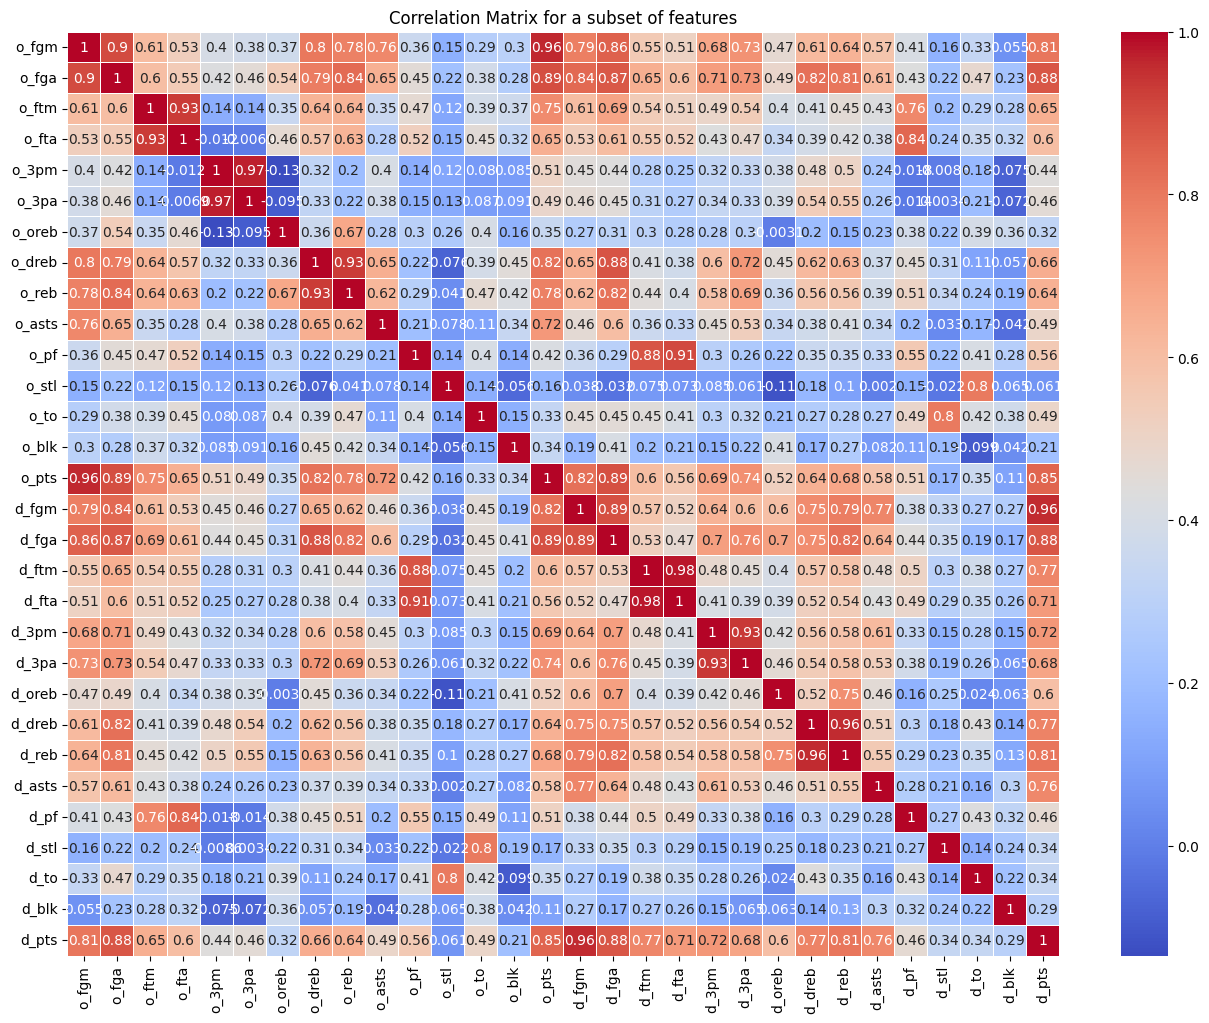

In [1241]:
# Select a subset of features
features = ['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa',
       'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk',
       'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb',
       'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts']

# Calculate the correlation matrix for the subset of features
corr_matrix = teams[features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for a subset of features')
plt.show()

In [1242]:
# Drop the columns that are highly correlated
#teams.drop(['o_ftm','o_3pm','o_fgm','d_ftm','d_3pm','d_fgm'], axis=1, inplace=True)
#teams.drop(['o_oreb', 'o_dreb', 'd_oreb', 'd_dreb'], axis=1, inplace=True)

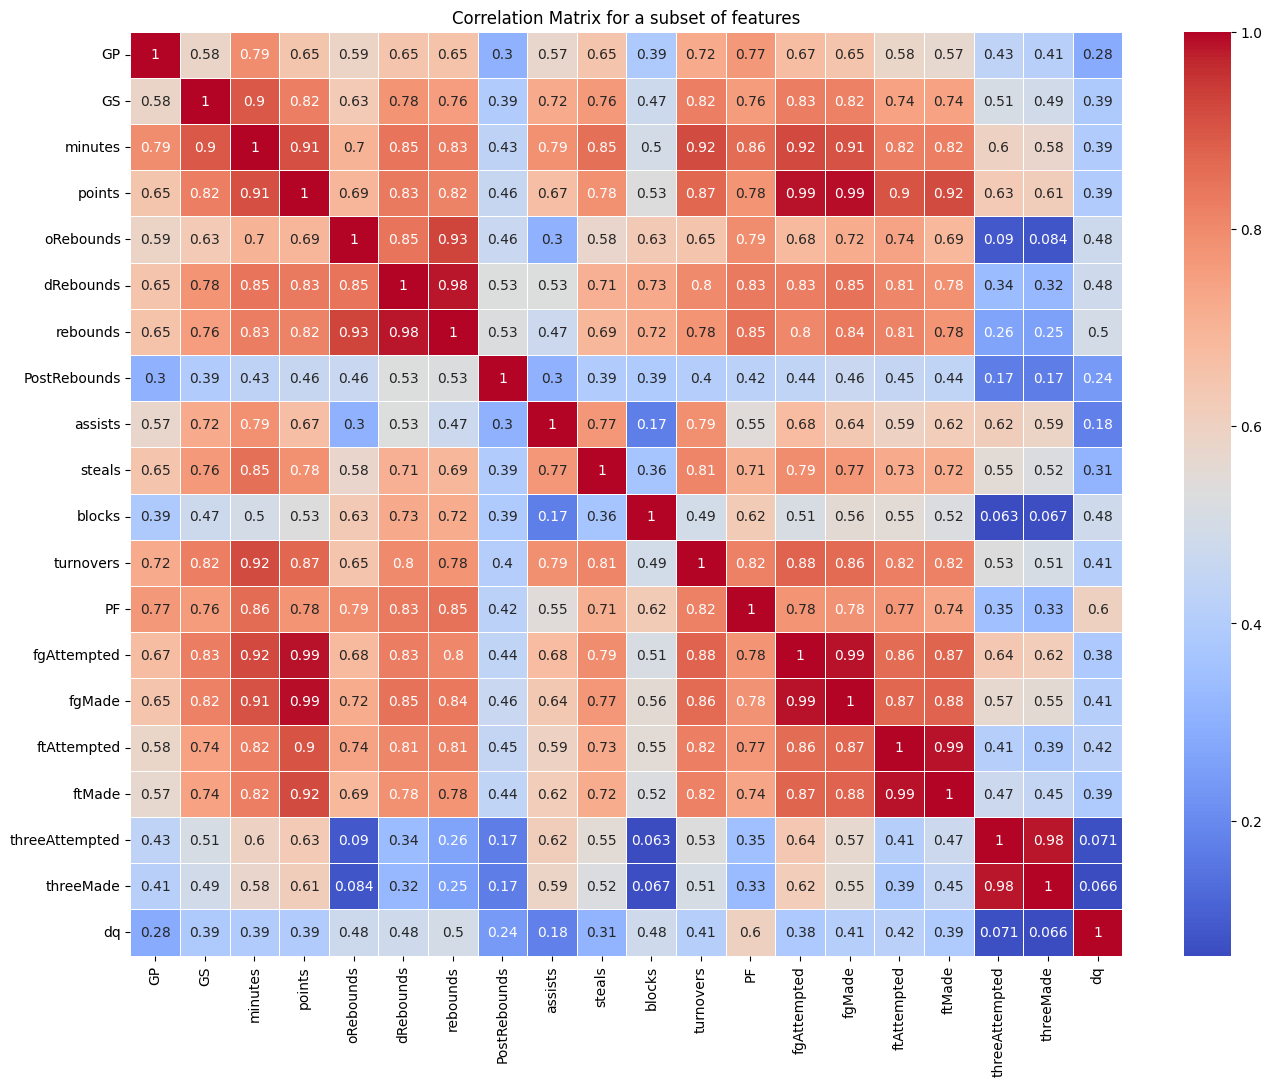

In [1243]:
# Select a subset of features
features = ['GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'PostRebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'dq']

# Calculate the correlation matrix for the subset of features
corr_matrix = players_teams[features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for a subset of features')
plt.show()

In [1244]:
players_teams.drop(['dRebounds'], axis=1, inplace=True)

In [1245]:

award_points = {
    'All-Star Game Most Valuable Player': 5,
    'Defensive Player of the Year': 7,
    'Kim Perrot Sportsmanship Award': 0,
    'Most Improved Player': 6,
    'Most Valuable Player': 10,
    'Rookie of the Year': 7,
    'Sixth Woman of the Year': 5,
    'WNBA Finals Most Valuable Player': 9,
    'WNBA All-Decade Team': 10,
    'WNBA All Decade Team Honorable Mention': 5,
    'Coach of the Year': 1
}
awards_players['award_points'] = awards_players['award'].map(award_points)


grouped_df = awards_players.groupby(['playerID', 'year'], as_index=False)['award_points'].sum()

#order it by playerID and then by year
grouped_df = grouped_df.sort_values(by=['playerID', 'year'])


def calculate_last_3_years_sum(player_id, year):
    # Filter the DataFrame for the specific player
    player_data = grouped_df[grouped_df['playerID'] == player_id]
    
    # Get the last 3 years including the current year
    last_years = player_data[(player_data['year'] <= year) & (player_data['year'] > year - 3)]
    
    # Sum the award points, treating non-existent years as 0
    total_points = last_years['award_points'].sum()  # Sum existing points
   
    return total_points

# Add a new column for the last 3 years' sum
grouped_df['last_3_years_sum'] = grouped_df.apply(
    lambda row: calculate_last_3_years_sum(row['playerID'], row['year']), axis=1
)

# Calculate all_time_sum
def calculate_all_time_sum(player_id, current_year):
    # Filter the DataFrame for the specific player
    player_data = grouped_df[grouped_df['playerID'] == player_id]
    
    # Filter for years less than or equal to the current year
    player_data_current_year = player_data[player_data['year'] <= current_year]
    
    # Initialize a variable to hold the sum of award points
    total_points = 0

    # Iterate through the filtered DataFrame
    for index, row in player_data_current_year.iterrows():
        if row["year"] <= current_year:  # Check if the year is less than 5
            total_points += row["award_points"]  # Add award points to total_points

    return total_points

# Add a new column for the all-time sum of points
grouped_df['all_time_sum'] = grouped_df.apply(
    lambda row: calculate_all_time_sum(row['playerID'], row['year']), axis=1
)

# Create a DataFrame for years 1 to 10
years = pd.DataFrame({'year': range(1, 11)})

# Get unique player IDs
unique_players = grouped_df['playerID'].unique()

# Create a DataFrame with all combinations of playerIDs and years
all_combinations = pd.MultiIndex.from_product([unique_players, years['year']], names=['playerID', 'year']).to_frame(index=False)

# Merge with the grouped_df to get existing values
merged_df = all_combinations.merge(
    grouped_df[['playerID', 'year', 'award_points']],
    on=['playerID', 'year'],
    how='left'
)

# Fill NaN values in 'award_points' with 0 (for years with no awards)
merged_df['award_points'] = merged_df['award_points'].fillna(0)

# Add the last_3_years_sum column
merged_df['last_3_years_sum'] = merged_df.apply(
    lambda row: calculate_last_3_years_sum(row['playerID'], row['year']), axis=1
)

# Add the all_time_sum column
merged_df['all_time_sum'] = merged_df.apply(
    lambda row: calculate_all_time_sum(row['playerID'], row['year']), axis=1
)


In [1246]:
# maybe remove this ?
def calculate_last_3_years_sum_column(player_id, year,column):
    # Filter the DataFrame for the specific player
    player_data = merged_result[merged_result['playerID'] == player_id]
    
    # Get the last 3 years including the current year
    last_years = player_data[(player_data['year'] <= year) & (player_data['year'] > year - 3)]
    
    
    total_points = last_years[column].sum()  # Sum existing points
   
    return total_points

In [1247]:
# Adding postseason statistics to regular season statistics for each player
for year, lg_data in players_teams.groupby('year'):

    # Retrieve the league statistics
    lg_pts = lg_data['points'].sum() + lg_data['PostPoints'].sum()
    lg_rb = lg_data['rebounds'].sum() + lg_data['PostRebounds'].sum()
    lg_ast = lg_data['assists'].sum() + lg_data['PostAssists'].sum()
    lg_stl = lg_data['steals'].sum() + lg_data['PostSteals'].sum()
    lg_blk = lg_data['blocks'].sum() + lg_data['PostBlocks'].sum()
    lg_to = lg_data['turnovers'].sum() + lg_data['PostTurnovers'].sum()
    lg_pf = lg_data['PF'].sum() + lg_data['PostPF'].sum()
    lg_fga = lg_data['fgAttempted'].sum() + lg_data['PostfgAttempted'].sum()
    lg_fg = lg_data['fgMade'].sum() + lg_data['PostfgMade'].sum()
    lg_fta = lg_data['ftAttempted'].sum() + lg_data['PostftAttempted'].sum()
    lg_ft = lg_data['ftMade'].sum() + lg_data['PostftMade'].sum()
    lg_tra = lg_data['threeAttempted'].sum() + lg_data['PostthreeAttempted'].sum()
    lg_tr = lg_data['threeMade'].sum() + lg_data['PostthreeMade'].sum()

    
    # Calculate the performance of each player in each team
    for playerID, pl_data in lg_data.groupby('playerID'):
        pl_min = pl_data['minutes'].sum() + pl_data['PostMinutes'].sum()
        pl_pts = pl_data['points'].sum() + pl_data['PostPoints'].sum()
        pl_rb = pl_data['rebounds'].sum() + pl_data['PostRebounds'].sum()
        pl_ast = pl_data['assists'].sum() + pl_data['PostAssists'].sum()
        pl_stl = pl_data['steals'].sum() + pl_data['PostSteals'].sum()
        pl_blk = pl_data['blocks'].sum() + pl_data['PostBlocks'].sum()
        pl_fg = pl_data['fgMade'].sum() + pl_data['PostfgMade'].sum()
        pl_ft = pl_data['ftMade'].sum() + pl_data['PostftMade'].sum()
        pl_to = pl_data['turnovers'].sum() + pl_data['PostTurnovers'].sum()
        pl_pf = pl_data['PF'].sum() + pl_data['PostPF'].sum()
        pl_fga = pl_data['fgAttempted'].sum() + pl_data['PostfgAttempted'].sum()
        pl_fta = pl_data['ftAttempted'].sum() + pl_data['PostftAttempted'].sum()
        pl_tr = pl_data['threeMade'].sum() + pl_data['PostthreeMade'].sum()
        pl_tra = pl_data['threeAttempted'].sum() + pl_data['PostthreeAttempted'].sum()

        # Calculate player efficiency
        # Multiply by minutes to give more weight to players with more minutes
        # Also divide by league statistics to normalize
        pl_efficiency = (
            pl_min * (
                pl_pts + pl_rb + pl_ast + pl_stl + pl_blk + 
                (pl_tr - pl_tra) - (pl_fga - pl_fg) - 
                (pl_fta - pl_ft) - pl_to - pl_pf
            )
        ) / (
            (
                lg_pts + lg_rb + lg_ast + lg_stl + lg_blk + 
                (lg_tr - lg_tra) - (lg_fga - lg_fg) - 
                (lg_fta - lg_ft) - lg_to - lg_pf
            )
        )

        # Round to 2 decimal places
        pl_efficiency = round(pl_efficiency, 2)

        # Add the efficiency to the player's data
        players_teams.loc[pl_data.index, 'pl_efficiency'] = pl_efficiency

    
players_teams['pl_efficiency'].describe()

count    1873.000000
mean        5.084469
std         7.312919
min        -0.590000
25%         0.110000
50%         1.640000
75%         7.730000
max        43.080000
Name: pl_efficiency, dtype: float64

In [1248]:
# Drop all columns except the ones we need
players_teams.drop(players_teams.columns.difference(['playerID','tmID', 'year', 'playoff', 'award_points', 'pl_efficiency']), axis=1, inplace=True)
players_teams.describe()

,year,pl_efficiency
count,1873.000000,1873.000000
mean,5.320342,5.084469
std,2.904075,7.312919
min,1.000000,-0.590000
25%,3.000000,0.110000
50%,5.000000,1.640000
75%,8.000000,7.730000
max,10.000000,43.080000


In [1249]:
merged_result = pd.merge(merged_df, players_teams, on=['playerID', 'year'], how='inner')
merged_result.describe()

,year,award_points,last_3_years_sum,all_time_sum,pl_efficiency
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5.756024,1.638554,4.268072,7.298193,12.861717
std,2.781704,3.983587,6.995281,12.809961,10.033686
min,1.000000,0.000000,0.000000,0.000000,-0.400000
25%,3.000000,0.000000,0.000000,0.000000,4.935000
50%,6.000000,0.000000,0.000000,5.000000,11.305000
75%,8.000000,0.000000,7.000000,7.000000,18.027500
max,10.000000,24.000000,38.000000,82.000000,43.080000


In [1250]:
# merge the players_teams and players dataframes
merged_result = merged_result.merge(players, on='playerID', how='left')
merged_result.describe()

,year,award_points,last_3_years_sum,all_time_sum,pl_efficiency,height,weight
count,332.000000,332.000000,332.000000,332.000000,332.000000,325.000000,325.000000
mean,5.756024,1.638554,4.268072,7.298193,12.861717,71.692308,164.516923
std,2.781704,3.983587,6.995281,12.809961,10.033686,3.362479,20.942245
min,1.000000,0.000000,0.000000,0.000000,-0.400000,63.000000,124.000000
25%,3.000000,0.000000,0.000000,0.000000,4.935000,69.000000,145.000000
50%,6.000000,0.000000,0.000000,5.000000,11.305000,72.000000,165.000000
75%,8.000000,0.000000,7.000000,7.000000,18.027500,74.000000,179.000000
max,10.000000,24.000000,38.000000,82.000000,43.080000,77.000000,215.000000


In [1251]:
# merge with coaches ???

In [1252]:
# merge with teams
merged_result = merged_result.merge(teams, on=['tmID', 'year'], how='left')
merged_result.describe()

,year,award_points,last_3_years_sum,all_time_sum,pl_efficiency,height,weight,rank,o_fgm,o_fga,...,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min
count,332.000000,332.000000,332.000000,332.000000,332.000000,325.000000,325.000000,332.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5.756024,1.638554,4.268072,7.298193,12.861717,71.692308,164.516923,3.503012,877.171687,2067.753012,...,17.963855,15.524096,33.487952,10.939759,5.804217,7.024096,9.719880,11.361446,9.804217,6771.722892
std,2.781704,3.983587,6.995281,12.809961,10.033686,3.362479,20.942245,1.976445,87.740747,174.280183,...,4.440124,4.414617,0.874188,2.654754,2.616629,2.517496,2.534922,3.256704,3.276887,184.111474
min,1.000000,0.000000,0.000000,0.000000,-0.400000,63.000000,124.000000,1.000000,647.000000,1740.000000,...,4.000000,4.000000,32.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,6400.000000
25%,3.000000,0.000000,0.000000,0.000000,4.935000,69.000000,145.000000,2.000000,818.000000,1920.000000,...,16.000000,12.000000,32.000000,10.000000,4.000000,5.000000,8.000000,10.000000,7.000000,6575.000000
50%,6.000000,0.000000,0.000000,5.000000,11.305000,72.000000,165.000000,3.000000,876.000000,2069.000000,...,18.000000,16.000000,34.000000,11.000000,6.000000,7.000000,10.000000,11.000000,10.000000,6850.000000
75%,8.000000,0.000000,7.000000,7.000000,18.027500,74.000000,179.000000,5.000000,923.000000,2195.000000,...,21.000000,18.000000,34.000000,13.000000,7.000000,8.000000,11.000000,13.000000,12.000000,6900.000000
max,10.000000,24.000000,38.000000,82.000000,43.080000,77.000000,215.000000,8.000000,1128.000000,2485.000000,...,28.000000,30.000000,34.000000,16.000000,16.000000,13.000000,16.000000,19.000000,19.000000,7025.000000


In [1253]:
# Adding postseason statistics to regular season statistics for each team
    # teams: "year","lgID","tmID","franchID","confID","divID","rank","playoff","seeded","firstRound","semis","finals","name","o_fgm","o_fga","o_ftm","o_fta","o_3pm","o_3pa","o_oreb","o_dreb","o_reb","o_asts","o_pf","o_stl","o_to","o_blk","o_pts","d_fgm","d_fga","d_ftm","d_fta","d_3pm","d_3pa","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","tmORB","tmDRB","tmTRB","opptmORB","opptmDRB","opptmTRB","won","lost","GP","homeW","homeL","awayW","awayL","confW","confL","min","attend","arena"
for year, lg_data in merged_result.groupby('year'):

    # Retrieve the league statistics
    lg_ofgm = lg_data['o_fgm'].sum()
    lg_ofga = lg_data['o_fga'].sum()
    lg_oftm = lg_data['o_ftm'].sum()
    lg_ofta = lg_data['o_fta'].sum()
    lg_o3pm = lg_data['o_3pm'].sum()
    lg_o3pa = lg_data['o_3pa'].sum()
    lg_oreb = lg_data['o_oreb'].sum()
    lg_odreb = lg_data['o_dreb'].sum()
    lg_oreb = lg_data['o_reb'].sum()
    lg_oasts = lg_data['o_asts'].sum()
    lg_opf = lg_data['o_pf'].sum()
    lg_ostl = lg_data['o_stl'].sum()
    lg_oto = lg_data['o_to'].sum()
    lg_oblk = lg_data['o_blk'].sum()
    lg_opts = lg_data['o_pts'].sum()
    lg_dfgm = lg_data['d_fgm'].sum()
    lg_dfga = lg_data['d_fga'].sum()
    lg_dftm = lg_data['d_ftm'].sum()
    lg_dfta = lg_data['d_fta'].sum()
    lg_d3pm = lg_data['d_3pm'].sum()
    lg_d3pa = lg_data['d_3pa'].sum()
    lg_doreb = lg_data['d_oreb'].sum()
    lg_ddreb = lg_data['d_dreb'].sum()
    lg_dreb = lg_data['d_reb'].sum()
    lg_dasts = lg_data['d_asts'].sum()
    lg_dpf = lg_data['d_pf'].sum()
    lg_dstl = lg_data['d_stl'].sum()
    lg_dto = lg_data['d_to'].sum()
    lg_dblk = lg_data['d_blk'].sum()
    lg_dpts = lg_data['d_pts'].sum()
    lg_won = lg_data['won'].sum()
    lg_lost = lg_data['lost'].sum()
    lg_homew = lg_data['homeW'].sum()
    lg_homel = lg_data['homeL'].sum()
    lg_awayw = lg_data['awayW'].sum()
    lg_awayl = lg_data['awayL'].sum()
    lg_confw = lg_data['confW'].sum()
    lg_confl = lg_data['confL'].sum()

    # Calculate the performance of each team in each year
    for year, tmID in merged_result.groupby('year'):

        tm_min = tmID['min'].sum()
        tm_ofgm = tmID['o_fgm'].sum()
        tm_ofga = tmID['o_fga'].sum()
        tm_oftm = tmID['o_ftm'].sum()
        tm_ofta = tmID['o_fta'].sum()
        tm_o3pm = tmID['o_3pm'].sum()
        tm_o3pa = tmID['o_3pa'].sum()
        tm_odreb = tmID['o_dreb'].sum()
        tm_oasts = tmID['o_asts'].sum()
        tm_opf = tmID['o_pf'].sum()
        tm_ostl = tmID['o_stl'].sum()
        tm_oto = tmID['o_to'].sum()
        tm_oblk = tmID['o_blk'].sum()
        tm_opts = tmID['o_pts'].sum()
        tm_dfgm = tmID['d_fgm'].sum()
        tm_dfga = tmID['d_fga'].sum()
        tm_dftm = tmID['d_ftm'].sum()
        tm_dfta = tmID['d_fta'].sum()
        tm_d3pm = tmID['d_3pm'].sum()
        tm_d3pa = tmID['d_3pa'].sum()
        tm_ddreb = tmID['d_dreb'].sum()
        tm_dreb = tmID['d_reb'].sum()
        tm_dasts = tmID['d_asts'].sum()
        tm_dpf = tmID['d_pf'].sum()
        tm_dstl = tmID['d_stl'].sum()
        tm_dto = tmID['d_to'].sum()
        tm_dblk = tmID['d_blk'].sum()
        tm_dpts = tmID['d_pts'].sum()
        tm_won = tmID['won'].sum()
        tm_lost = tmID['lost'].sum()
        tm_homew = tmID['homeW'].sum()
        tm_homel = tmID['homeL'].sum()
        tm_awayw = tmID['awayW'].sum()
        tm_awayl = tmID['awayL'].sum()
        tm_confw = tmID['confW'].sum()
        tm_confl = tmID['confL'].sum()

        

        # Calculate team efficiency
        # Multiply by minutes to give more weight to teams with more minutes
        # Also divide by league statistics to normalize
        tm_efficiency = (
            tm_min *
            (
                tm_opts + tm_dpts + tm_odreb + tm_oasts + tm_ostl + tm_oblk + 
                (tm_o3pm - tm_o3pa) + (tm_ofgm - tm_ofga) + 
                (tm_oftm - tm_ofta) - tm_oto - tm_opf -
                tm_ddreb - tm_dasts - tm_dstl - tm_dblk -
                (tm_d3pm - tm_d3pa) - (tm_dfgm - tm_dfga) -
                (tm_dftm - tm_dfta) - tm_dto - tm_dpf - tm_dpts +
                tm_won - tm_lost + tm_homew - tm_homel + tm_awayw - tm_awayl + tm_confw - tm_confl

                
            )
        ) / (
            (
                lg_opts + lg_dpts + lg_ofgm + lg_odreb + lg_oasts + lg_ostl + lg_oblk + 
                (lg_o3pm - lg_o3pa) + (lg_ofgm - lg_ofga) + 
                (lg_oftm - lg_ofta) - lg_oto - lg_opf -
                lg_ddreb - lg_dasts - lg_dstl - lg_dblk -
                (lg_d3pm - lg_d3pa) - (lg_dfgm - lg_dfga) -
                (lg_dftm - lg_dfta) - lg_dto - lg_dpf - lg_dpts +
                lg_won - lg_lost + lg_homew - lg_homel + lg_awayw - lg_awayl + lg_confw - lg_confl
            )
        )

        # Round to 2 decimal places
        tm_efficiency = round(tm_efficiency, 2)

        # Add the efficiency to the team's data
        merged_result.loc[tmID.index, 'tm_efficiency'] = tm_efficiency


merged_result['tm_efficiency'].describe()

count      332.000000
mean     20156.469849
std      24235.183611
min      -9824.610000
25%      -2174.010000
50%      20768.050000
75%      34146.050000
max      63255.840000
Name: tm_efficiency, dtype: float64

In [1254]:
# Add average height of the team
merged_result['avg_height'] = merged_result.groupby(['year', 'tmID'])['height'].transform('mean')

# Add average weight of the team
merged_result['avg_weight'] = merged_result.groupby(['year', 'tmID'])['weight'].transform('mean')

# Add average player efficiency of the team
merged_result['avg_pl_efficiency'] = merged_result.groupby(['year', 'tmID'])['pl_efficiency'].transform('mean')

In [1255]:
# drop all columns except 'tmID', 'confID', 'year', 'playoff', 'award_points', 'avg_height, 'avg_weight ,'pl_efficiency', 'tm_efficiency'
merged_result.drop(merged_result.columns.difference(['tmID', 'confID', 'year', 'playoff', 'award_points', 'avg_height', 'avg_weight', 'avg_pl_efficiency', 'pl_efficiency', 'tm_efficiency']), axis=1, inplace=True)

merged_result.head()

,year,award_points,last_3_years_sum,all_time_sum,tmID,pl_efficiency,confID,playoff,tm_efficiency,avg_height,avg_weight,avg_pl_efficiency
0,1,0.0,0,0,HOU,11.97,WE,Y,2837.48,72.333333,156.666667,25.1625
1,2,6.0,6,6,HOU,19.88,WE,Y,-5048.57,72.500000,162.500000,18.0250
2,3,0.0,6,6,HOU,16.60,WE,Y,-2174.01,73.500000,157.000000,16.5075
3,4,0.0,6,6,HOU,18.13,WE,Y,34146.05,73.500000,157.000000,14.9040
4,6,0.0,0,6,HOU,15.10,WE,Y,-9824.61,72.333333,160.333333,15.1700


In [1256]:
# Export the cleaned dataframes to CSV files
merged_result.to_csv("../data/clean/merged.csv", index=False)
#teams.to_csv("../data/clean/teams.csv", index=False)